# Clean ACM

This notebook is used to clean and standardize the current ACM dataset using LLMs and Regex.

## TODO:
- [ ] Date-time
- [ ] Journal/Publication reference
- [ ] Attendants and their roles
- [ ] results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from bertopic import BERTopic

/home/cfoye/.pyenv/versions/impresso/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
acm_competitions = pd.read_csv("Data/ACM/AcmEPFL.csv")

In [4]:
acm_competitions.head(5)

,Nom de l'objet,Programme,Adresse 1,Adresse 2,Adresse 3,Numéro postal,Localité,Canton - Département,Pays,Date de début de l'objet,Date de fin de l'objet,Concours ouvert à,Notes de l'objet,Auteurs,Rôle de l'auteur,Dossiers reliés,Pièces reliées
0,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,1872,1872,A. national,Ouvert par la Municipalité sur décret du 15 ma...,NaN,NaN,NaN,NaN
1,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,1872,NaN,NaN,Le concours est mentionné en 1878 (Eisenbahn v...,"Stadler +;Ritscher von Steinbeck +;Recordon, B...","3e prix;3e prix;Juré, rapporteur;Concurrent;2e...",NaN,NaN
2,Concours (1er degré) pour le monument du génér...,NaN,NaN,NaN,NaN,NaN,Genève,NaN,Suisse,1877,12.1877,National,Chercher dans Eisenbahn vol. V une annonce d'o...,"Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz,...",Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;J...,NaN,NaN
3,Concours restreint pour le nouveau Musée de la...,NaN,NaN,NaN,NaN,NaN,Mulhouse,NaN,NaN,1879,1879,NaN,"""Par suite d'un concours entre un nombre restr...","Rütti, Ludwig Friedrich von",Concurrent,NaN,NaN
4,Concours d'éléments analytiques : 2e classe : ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882,NaN,NaN,NaN,NaN,NaN,NaN,0138.04.0001/262


In [5]:
# Function to parse varying date formats
def parse_date(date_str):
    if pd.isna(date_str) or not isinstance(date_str, str):
        return np.nan  # Return NaT for missing values

    date_str = date_str.strip()

    try:
        # Try parsing full date format: DD.MM.YYYY
        return pd.to_datetime(date_str, format='%d.%m.%Y')
    except ValueError:
        try:
            # Try parsing month and year: MM.YYYY
            return pd.to_datetime(date_str, format='%m.%Y')
        except ValueError:
            try:
                # Try parsing only the year: YYYY
                return pd.to_datetime(date_str, format='%Y')
            except ValueError:
                return np.nan  # Return NaT if nothing works

# Apply the function to date columns
acm_competitions["Date de début de l'objet"] = acm_competitions["Date de début de l'objet"].apply(parse_date)
acm_competitions["Date de fin de l'objet"] = acm_competitions["Date de fin de l'objet"].apply(parse_date)

# Display the converted data types
print(acm_competitions.dtypes)

Nom de l'objet                      object
Programme                           object
Adresse 1                           object
Adresse 2                           object
Adresse 3                           object
Numéro postal                      float64
Localité                            object
Canton - Département                object
Pays                                object
Date de début de l'objet    datetime64[ns]
Date de fin de l'objet      datetime64[ns]
Concours ouvert à                   object
Notes de l'objet                    object
Auteurs                             object
Rôle de l'auteur                    object
Dossiers reliés                     object
Pièces reliées                      object
dtype: object


In [6]:
debut_years = acm_competitions['Date de début de l\'objet'].dt.year

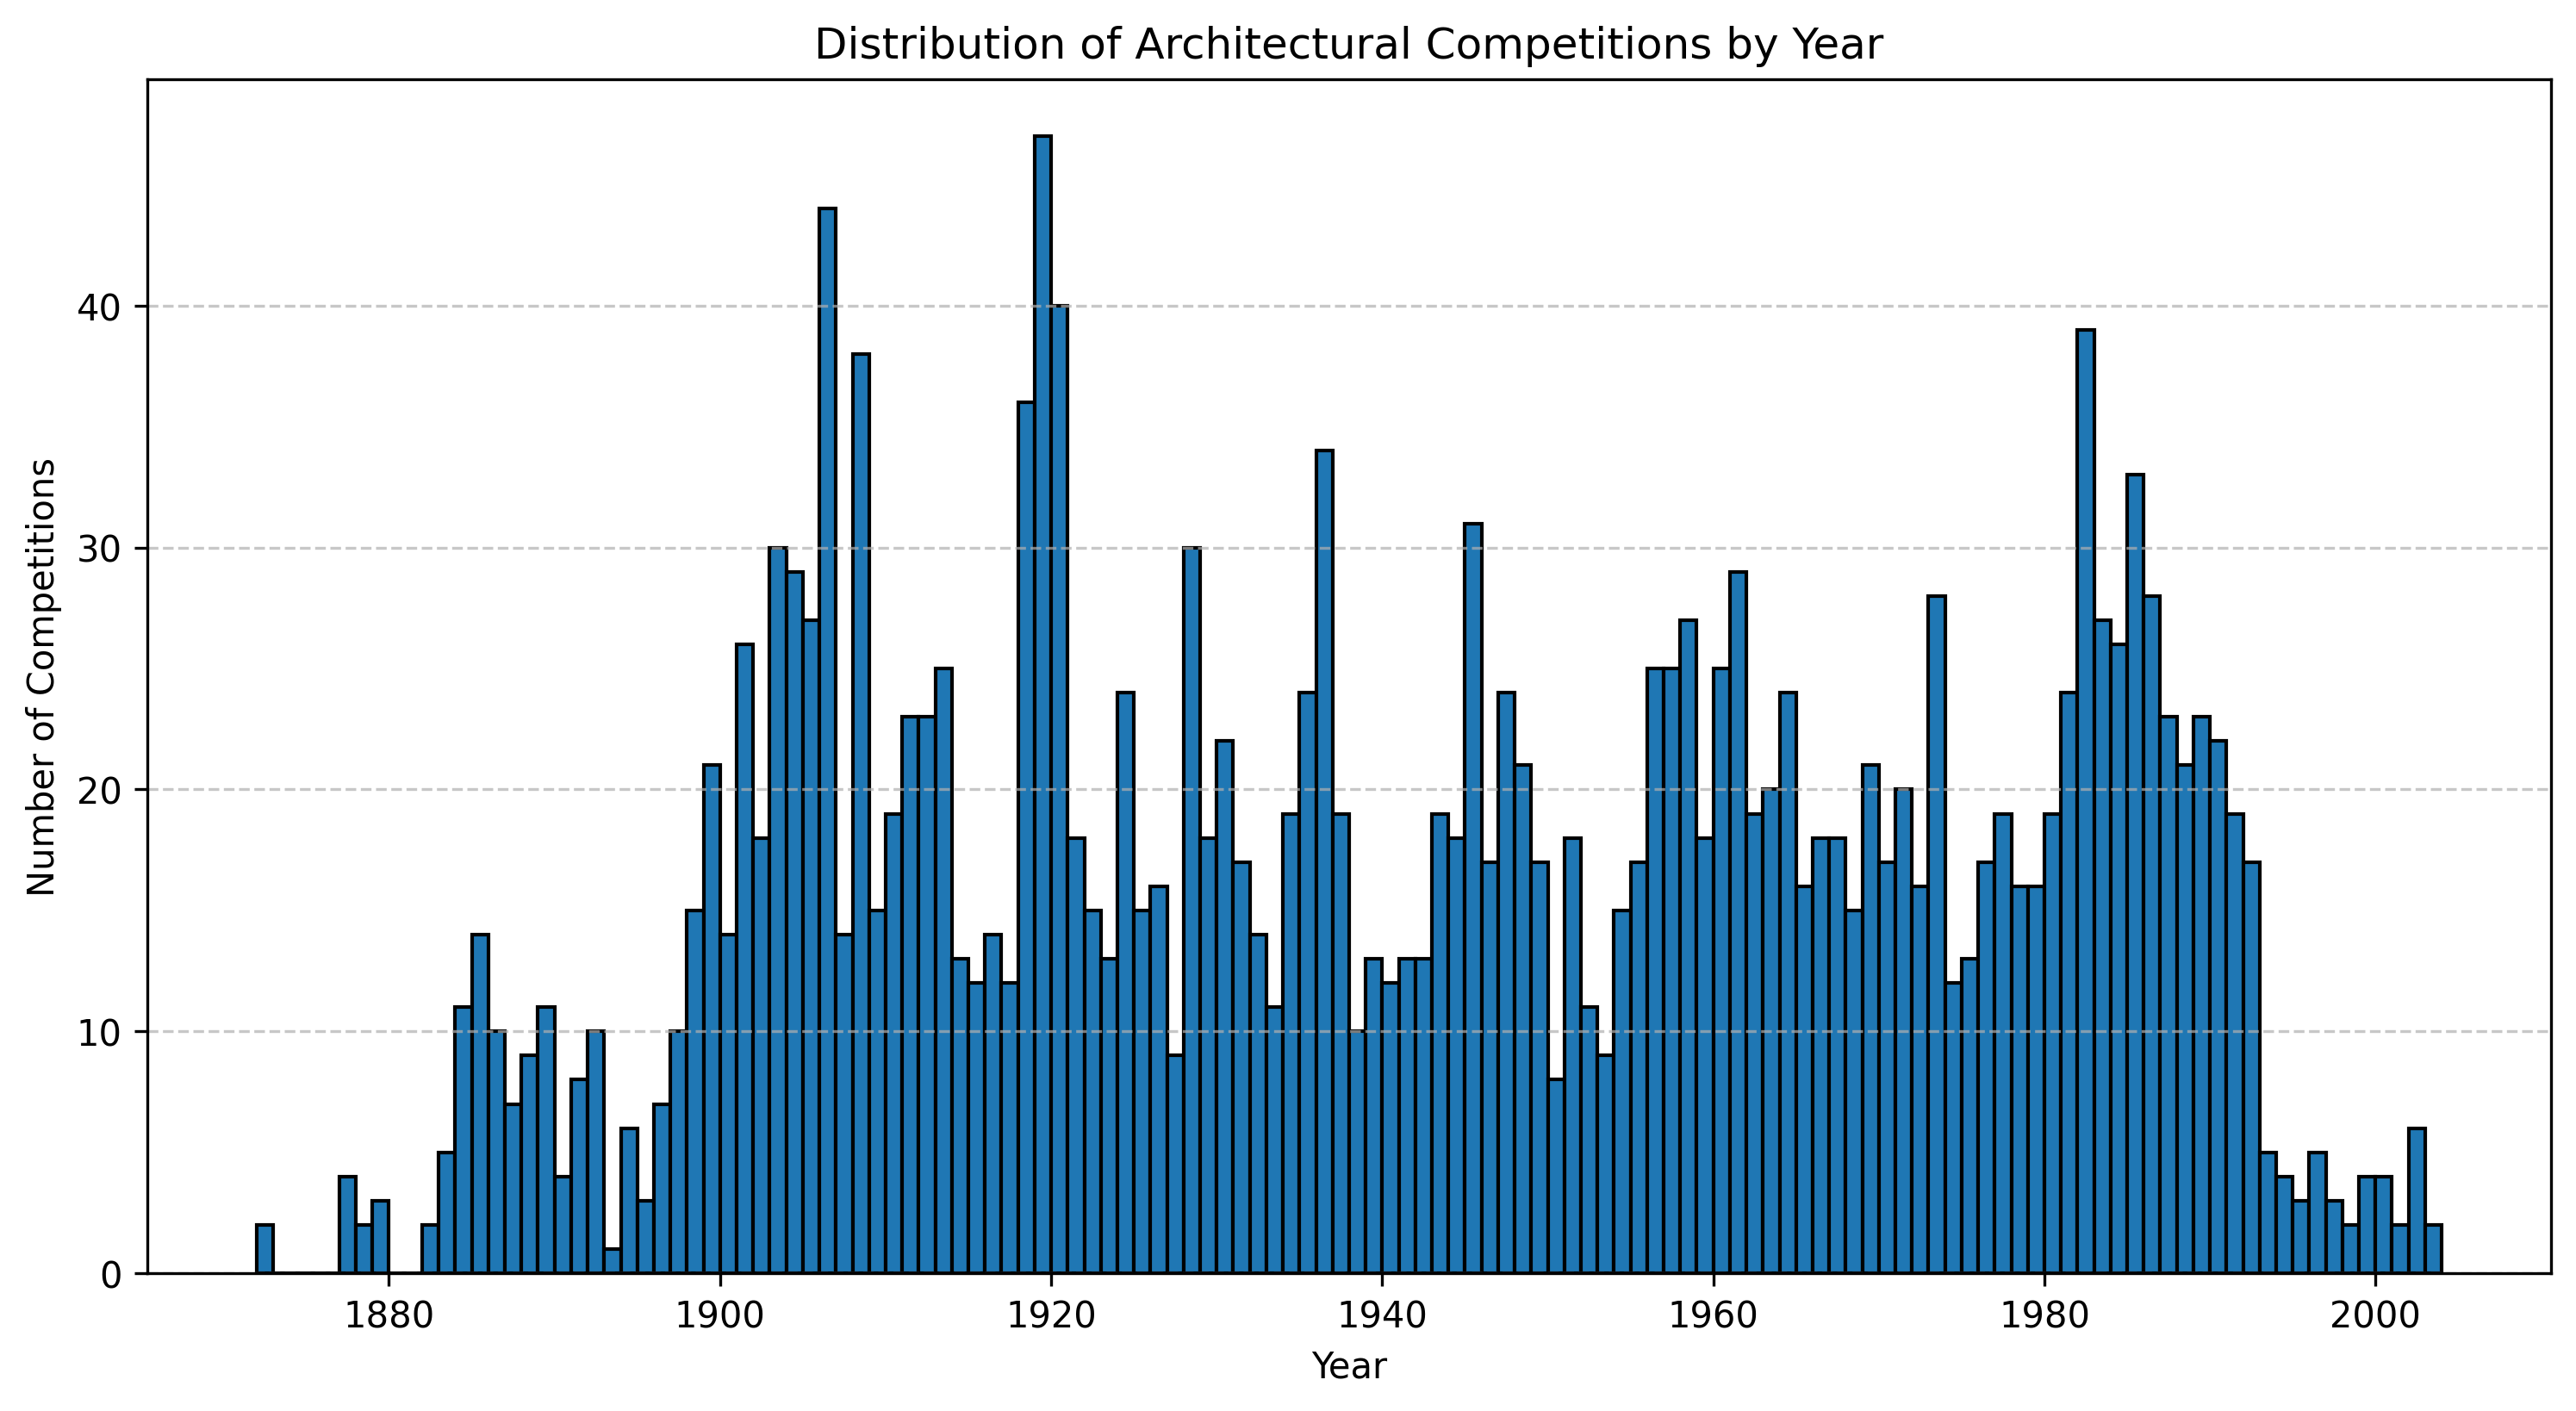

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(debut_years.dropna(), bins=range(int(debut_years.min()), int(debut_years.max()) + 1, 1), edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Competitions")
plt.title("Distribution of Architectural Competitions by Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [13]:
for a in acm_competitions['Auteurs']:
    print(a)

nan
Stadler +;Ritscher von Steinbeck +;Recordon, Benjamin;Rouge +;Moritz;Monneron +
Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz, E;Iguel, Charles;Bourdillon, André Marcel;Lasius, G;Menn, Barthélemy;Dorcière, L;Stehlin, Johann Jakob (II);Franel, Jean;Millet, Aimé
Rütti, Ludwig Friedrich von
nan
Lesueur, Jean-Baptiste-Cicéron
Turnbull;Bell & Cie;Escher Wyss & Cie;Rieter & Cie
nan
Guillaume, Edmond-Jean-Baptiste
Mayor, William;Rychner, Alfred
Colin, James Edouard;Ritter +;Piquet, Edouard-Eugène +;Favre, H
Châtelain, Léo;Droz, A
Colin, James Edouard;Mayor, William;Rychner, Alfred
nan
nan
nan
nan
Section des Beaux-Arts de l'Institut National Genevois
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Nénot, H.-P;Auer, Hans;Lasius, G;Hoffmann, Ludwig;Hirsch, Q;Cuénoud, Samuel;Ruffy, E;Golliez, H
Regamey, Jaques;Isoz, Francis;Hünerwadel, Theodor +;Bezencenet, Louis &;Meyer, Henri +;Girardet, Alexandre &
Flégel;Chaudet, Henri;Clerc, Gustave;néant
nan
Meyer;Siber, Gustav
Maillard, Louis;

In [9]:
import pandas as pd
import re

def combine_artists(artist_str):
    """
    Given a semicolon-separated string of artist names,
    combine adjacent tokens when an artist's name ends with a '+' or '&'.
    Remove the trailing joiner and merge the tokens using commas.
    
    Returns a list of lists, where each inner list contains one combined string.
    
    For example, given:
      "Stadler+; Ritscher von Steinbeck+; Recordon; Benjamin Rouge+; Moritz Monneron+; Colomb; Eugène"
    the output will be:
      [
        ["Stadler, Ritscher von Steinbeck, Recordon"],
        ["Benjamin Rouge, Moritz Monneron, Colomb, Eugène"]
      ]
    """
    if pd.isna(artist_str):
        return None
    # Split by semicolons and remove extra spaces
    tokens = [token.strip() for token in artist_str.split(";") if token.strip()]
    
    groups = []
    temp = []
    for token in tokens:
        # Check if token ends with a joiner (+ or &)
        if token.endswith("+") or token.endswith("&"):
            # Append token without the trailing joiner(s)
            temp.append(re.sub(r"[+&]+$", "", token).strip())
        else:
            if temp:
                # There is an ongoing collaboration; add the current token and combine
                temp.append(token)
                # combined = ", ".join(temp)
                groups.append(temp)
                temp = []
            else:
                # No collaboration joiner; treat as an individual group
                groups.append([token])
    # If there's an unfinished collaboration at the end, combine it.
    if temp:
        combined = ", ".join(temp)
        groups.append([combined])
    return groups



# Load the CSV file AcmEPFL.csv (adjust path if needed)

# Apply the function on the "Auteurs" column and store in a new column "CombinedArtists"
acm_competitions["CombinedArtists"] = acm_competitions["Auteurs"].apply(combine_artists)

# Display a few sample rows
print(acm_competitions[["Auteurs", "CombinedArtists"]].head(10))


                                             Auteurs  \
0                                                NaN   
1  Stadler +;Ritscher von Steinbeck +;Recordon, B...   
2  Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz,...   
3                        Rütti, Ludwig Friedrich von   
4                                                NaN   
5                     Lesueur, Jean-Baptiste-Cicéron   
6  Turnbull;Bell & Cie;Escher Wyss & Cie;Rieter &...   
7                                                NaN   
8                    Guillaume, Edmond-Jean-Baptiste   
9                     Mayor, William;Rychner, Alfred   

                                     CombinedArtists  
0                                               None  
1  [[Stadler, Ritscher von Steinbeck, Recordon, B...  
2  [[Thomas, Jules], [Cain, Auguste-Nicolas], [Ro...  
3                    [[Rütti, Ludwig Friedrich von]]  
4                                               None  
5                 [[Lesueur, Jean-Baptiste-Cicéron]] 

In [10]:
acm_competitions['CombinedArtists'].values[1]

[['Stadler', 'Ritscher von Steinbeck', 'Recordon, Benjamin'],
 ['Rouge', 'Moritz'],
 ['Monneron']]

In [22]:
acm_competitions['is_jury'] = acm_competitions['Nom de l\'objet'].apply(lambda object_name :  "jugement" in object_name)


In [23]:
acm_competitions

,Nom de l'objet,Programme,Adresse 1,Adresse 2,Adresse 3,Numéro postal,Localité,Canton - Département,Pays,Date de début de l'objet,Date de fin de l'objet,Concours ouvert à,Notes de l'objet,Auteurs,Rôle de l'auteur,Dossiers reliés,Pièces reliées,CombinedArtists,is_jury
0,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,1872-01-01,1872-01-01,A. national,Ouvert par la Municipalité sur décret du 15 ma...,NaN,NaN,NaN,NaN,None,False
1,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,1872-01-01,NaT,NaN,Le concours est mentionné en 1878 (Eisenbahn v...,"Stadler +;Ritscher von Steinbeck +;Recordon, B...","3e prix;3e prix;Juré, rapporteur;Concurrent;2e...",NaN,NaN,"[[Stadler, Ritscher von Steinbeck, Recordon, B...",True
2,Concours (1er degré) pour le monument du génér...,NaN,NaN,NaN,NaN,NaN,Genève,NaN,Suisse,1877-01-01,1877-12-01,National,Chercher dans Eisenbahn vol. V une annonce d'o...,"Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz,...",Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;J...,NaN,NaN,"[[Thomas, Jules], [Cain, Auguste-Nicolas], [Ro...",False
3,Concours restreint pour le nouveau Musée de la...,NaN,NaN,NaN,NaN,NaN,Mulhouse,NaN,NaN,1879-01-01,1879-01-01,NaN,"""Par suite d'un concours entre un nombre restr...","Rütti, Ludwig Friedrich von",Concurrent,NaN,NaN,"[[Rütti, Ludwig Friedrich von]]",True
4,Concours d'éléments analytiques : 2e classe : ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1882-01-01,NaT,NaN,NaN,NaN,NaN,NaN,0138.04.0001/262,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,"Concours ""Reflet"" hôtel",NaN,NaN,NaN,NaN,NaN,Ouchy,Vaud,Suisse,NaT,NaT,NaN,NaN,NaN,NaN,0133.04.0316,NaN,None,False
2382,"SIA, commission des concours-641",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0011.03.0037 ; 0011.03.0032 ; 0011.03.0034,NaN,None,False
2383,"SIA, commission des concours-642",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,0002.03.0102 ; 0002.03.0094 ; 0002.03.0101,NaN,None,False
2384,"Temple de Saint-Marc (Lausanne), concours",NaN,"Renens, chemin de, Sévery, avenue de",NaN,NaN,NaN,Lausanne,Vaud,Suisse,NaT,NaT,NaN,"Jury:Jean Tschumy, Edmond Virieux, arch. cant....",NaN,NaN,0003.04.0059,NaN,None,False


In [ ]:
for index, row in acm_competitions.iterrows():
    if row['is_jury']:
        row['paired_competitons'] = acm_competitions.index[acm_competitions['Nom de l\'objet'] == row['Nom de l\'objet'][:-10]]
    else:
        row['paired_competitons'] = acm_competitions.index[acm_competitions['Nom de l\'objet'] == row['Nom de l\'objet']+", jugement"]

In [26]:
# Attempt to pair together

# Ensure a unique identifier exists:
acm_competitions = acm_competitions.reset_index(drop=False).rename(columns={'index': 'orig_index'})
# Optionally create a new unique ID (if needed)
acm_competitions['comp_id'] = acm_competitions.index

def compute_pair(row, df):
    if row['is_jury']:
        # Use a unique identifier for pairing (e.g., based on "Nom de l'objet")
        key = row["Nom de l'objet"][:-10]
    else:
        key = row["Nom de l'objet"] + ", jugement"
    # Look up the row(s) with this key
    match = df[df["Nom de l'objet"] == key]
    # Return the current index values of the matching row(s)
    return match.index.tolist()

# Compute pairing using the unique identifier:
acm_competitions['paired_competitons'] = acm_competitions.apply(lambda row: compute_pair(row, acm_competitions), axis=1)

# Now, if you sort the DataFrame:
acm_competitions_sorted = acm_competitions.sort_values(by="Nom de l'objet").reset_index(drop=True)

# If you need pairing info on the sorted DataFrame, recompute:
acm_competitions_sorted['paired_competitons'] = acm_competitions_sorted.apply(lambda row: compute_pair(row, acm_competitions_sorted), axis=1)


In [30]:
acm_competitions

,orig_index,Nom de l'objet,Programme,Adresse 1,Adresse 2,Adresse 3,Numéro postal,Localité,Canton - Département,Pays,...,Concours ouvert à,Notes de l'objet,Auteurs,Rôle de l'auteur,Dossiers reliés,Pièces reliées,CombinedArtists,is_jury,paired_competitons,comp_id
0,0,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,...,A. national,Ouvert par la Municipalité sur décret du 15 ma...,NaN,NaN,NaN,NaN,None,False,[1],0
1,1,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,...,NaN,Le concours est mentionné en 1878 (Eisenbahn v...,"Stadler +;Ritscher von Steinbeck +;Recordon, B...","3e prix;3e prix;Juré, rapporteur;Concurrent;2e...",NaN,NaN,"[[Stadler, Ritscher von Steinbeck, Recordon, B...",True,[0],1
2,2,Concours (1er degré) pour le monument du génér...,NaN,NaN,NaN,NaN,NaN,Genève,NaN,Suisse,...,National,Chercher dans Eisenbahn vol. V une annonce d'o...,"Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz,...",Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;J...,NaN,NaN,"[[Thomas, Jules], [Cain, Auguste-Nicolas], [Ro...",False,[1540],2
3,3,Concours restreint pour le nouveau Musée de la...,NaN,NaN,NaN,NaN,NaN,Mulhouse,NaN,NaN,...,NaN,"""Par suite d'un concours entre un nombre restr...","Rütti, Ludwig Friedrich von",Concurrent,NaN,NaN,"[[Rütti, Ludwig Friedrich von]]",True,[],3
4,4,Concours d'éléments analytiques : 2e classe : ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0138.04.0001/262,None,False,[],4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2381,"Concours ""Reflet"" hôtel",NaN,NaN,NaN,NaN,NaN,Ouchy,Vaud,Suisse,...,NaN,NaN,NaN,NaN,0133.04.0316,NaN,None,False,[],2381
2382,2382,"SIA, commission des concours-641",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0011.03.0037 ; 0011.03.0032 ; 0011.03.0034,NaN,None,False,[],2382
2383,2383,"SIA, commission des concours-642",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0002.03.0102 ; 0002.03.0094 ; 0002.03.0101,NaN,None,False,[],2383
2384,2384,"Temple de Saint-Marc (Lausanne), concours",NaN,"Renens, chemin de, Sévery, avenue de",NaN,NaN,NaN,Lausanne,Vaud,Suisse,...,NaN,"Jury:Jean Tschumy, Edmond Virieux, arch. cant....",NaN,NaN,0003.04.0059,NaN,None,False,[],2384


In [ ]:
acm_competitions["Date de début de l\'objet"]

In [33]:
acm_competitions.sort_values(by="Date de début de l\'objet", ascending=True).head(20)

,orig_index,Nom de l'objet,Programme,Adresse 1,Adresse 2,Adresse 3,Numéro postal,Localité,Canton - Département,Pays,...,Concours ouvert à,Notes de l'objet,Auteurs,Rôle de l'auteur,Dossiers reliés,Pièces reliées,CombinedArtists,is_jury,paired_competitons,comp_id
0,0,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,...,A. national,Ouvert par la Municipalité sur décret du 15 ma...,NaN,NaN,NaN,NaN,None,False,[1],0
1,1,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,...,NaN,Le concours est mentionné en 1878 (Eisenbahn v...,"Stadler +;Ritscher von Steinbeck +;Recordon, B...","3e prix;3e prix;Juré, rapporteur;Concurrent;2e...",NaN,NaN,"[[Stadler, Ritscher von Steinbeck, Recordon, B...",True,[0],1
2,2,Concours (1er degré) pour le monument du génér...,NaN,NaN,NaN,NaN,NaN,Genève,NaN,Suisse,...,National,Chercher dans Eisenbahn vol. V une annonce d'o...,"Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz,...",Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;J...,NaN,NaN,"[[Thomas, Jules], [Cain, Auguste-Nicolas], [Ro...",False,[1540],2
1002,1002,Concours pour le Palais du Tribunal fédéral à ...,NaN,Montbenon,NaN,NaN,NaN,Lausanne,NaN,Vaud,...,A. national,Ouvert par la Municipalité au niveau national....,"Gindroz, François;Stehlin, Johann Jakob (II);R...","Juré;Juré;Juré;Juré, absent",NaN,NaN,"[[Gindroz, François], [Stehlin, Johann Jakob (...",False,[1116],1002
1214,1214,Concours pour un Hospice de la Vieillesse à Ge...,NaN,NaN,NaN,NaN,NaN,Anières,NaN,Suisse,...,A. national,Ouvert par la Commission Administrative de l'H...,"Vaucher, Henri;Racine, F;Verrey, Jules-Louis;C...",Juré;Juré;Juré;Juré;Juré;Juré;Juré,NaN,NaN,"[[Vaucher, Henri], [Racine, F], [Verrey, Jules...",False,[980],1214
1540,1540,Concours (1er degré) pour le monument du génér...,NaN,NaN,NaN,NaN,NaN,Genève,NaN,Suisse,...,NaN,Extrait de rapport du jury Eisenbahn 1878 vol....,"Pepin, Edouard;Lanz, Alfred;Simmler, Jacques &...",Prix 1'500.-;2e prix ex aequo;1er prix;Mentio...,NaN,NaN,"[[Pepin, Edouard], [Lanz, Alfred], [Simmler, J...",True,[2],1540
1116,1116,Concours pour le Palais du Tribunal fédéral à ...,NaN,Montbenon,NaN,NaN,NaN,Lausanne,NaN,Vaud,...,NaN,Rapport du jury Eisenbahn 1878 vol. VIII p.19 ...,"Recordon, Benjamin;Cattani, Arnold;Bourrit, Al...","Juré, rapporteur;2e prix;1er prix;1er prix;C...",NaN,NaN,"[[Recordon, Benjamin], [Cattani, Arnold], [Bou...",True,[1002],1116
980,980,Concours pour un Hospice de la Vieillesse à Ge...,NaN,NaN,NaN,NaN,NaN,Anières,NaN,Suisse,...,NaN,Extrait du rapport du jury Eisenbahn 1878 vol....,"Stadler, F;van Muyden, Théophile +;Camoletti, ...",3e prix;2e prix ex aequo;Juré;2e prix ex aequo...,NaN,NaN,"[[Stadler, F], [van Muyden, Théophile, Camolet...",True,[1214],980
3,3,Concours restreint pour le nouveau Musée de la...,NaN,NaN,NaN,NaN,NaN,Mulhouse,NaN,NaN,...,NaN,"""Par suite d'un concours entre un nombre restr...","Rütti, Ludwig Friedrich von",Concurrent,NaN,NaN,"[[Rütti, Ludwig Friedrich von]]",True,[],3
1787,1787,Concours pour une Caserne d'Infanterie à Lausanne,NaN,Pontaise,NaN,NaN,NaN,Lausanne,NaN,Vaud,...,NaN,Description et remarques Eisenbahn vol. X p.130,"Burnat, Ernest;Mauerhofer, Charles;Maget, Augu...","Juré;Juré;Juré;Juré;Juré, président",NaN,NaN,"[[Burnat, Ernest], [Mauerhofer, Charles], [Mag...",False,[2137],1787


In [37]:
acm_competitions_no_juries = acm_competitions[
    (~acm_competitions['is_jury']) | 
    (acm_competitions['is_jury'] & acm_competitions['paired_competitons'].apply(lambda x: not x))
]


In [38]:
acm_competitions_no_juries

,orig_index,Nom de l'objet,Programme,Adresse 1,Adresse 2,Adresse 3,Numéro postal,Localité,Canton - Département,Pays,...,Concours ouvert à,Notes de l'objet,Auteurs,Rôle de l'auteur,Dossiers reliés,Pièces reliées,CombinedArtists,is_jury,paired_competitons,comp_id
0,0,Concours pour le nouveau bâtiment des écoles d...,NaN,NaN,NaN,NaN,NaN,Vevey,NaN,Vaud,...,A. national,Ouvert par la Municipalité sur décret du 15 ma...,NaN,NaN,NaN,NaN,None,False,[1],0
2,2,Concours (1er degré) pour le monument du génér...,NaN,NaN,NaN,NaN,NaN,Genève,NaN,Suisse,...,National,Chercher dans Eisenbahn vol. V une annonce d'o...,"Thomas, Jules;Cain, Auguste-Nicolas;Rothpletz,...",Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;Juré;J...,NaN,NaN,"[[Thomas, Jules], [Cain, Auguste-Nicolas], [Ro...",False,[1540],2
3,3,Concours restreint pour le nouveau Musée de la...,NaN,NaN,NaN,NaN,NaN,Mulhouse,NaN,NaN,...,NaN,"""Par suite d'un concours entre un nombre restr...","Rütti, Ludwig Friedrich von",Concurrent,NaN,NaN,"[[Rütti, Ludwig Friedrich von]]",True,[],3
4,4,Concours d'éléments analytiques : 2e classe : ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0138.04.0001/262,None,False,[],4
5,5,Concours d'émulation - 2e classe - Esquisse: U...,NaN,NaN,NaN,NaN,NaN,Paris,NaN,France,...,NaN,"""Dans les grands palais, la chambre coucher d...","Lesueur, Jean-Baptiste-Cicéron",NaN,NaN,0138.04.0001/71,"[[Lesueur, Jean-Baptiste-Cicéron]]",False,[],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381,2381,"Concours ""Reflet"" hôtel",NaN,NaN,NaN,NaN,NaN,Ouchy,Vaud,Suisse,...,NaN,NaN,NaN,NaN,0133.04.0316,NaN,None,False,[],2381
2382,2382,"SIA, commission des concours-641",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0011.03.0037 ; 0011.03.0032 ; 0011.03.0034,NaN,None,False,[],2382
2383,2383,"SIA, commission des concours-642",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0002.03.0102 ; 0002.03.0094 ; 0002.03.0101,NaN,None,False,[],2383
2384,2384,"Temple de Saint-Marc (Lausanne), concours",NaN,"Renens, chemin de, Sévery, avenue de",NaN,NaN,NaN,Lausanne,Vaud,Suisse,...,NaN,"Jury:Jean Tschumy, Edmond Virieux, arch. cant....",NaN,NaN,0003.04.0059,NaN,None,False,[],2384


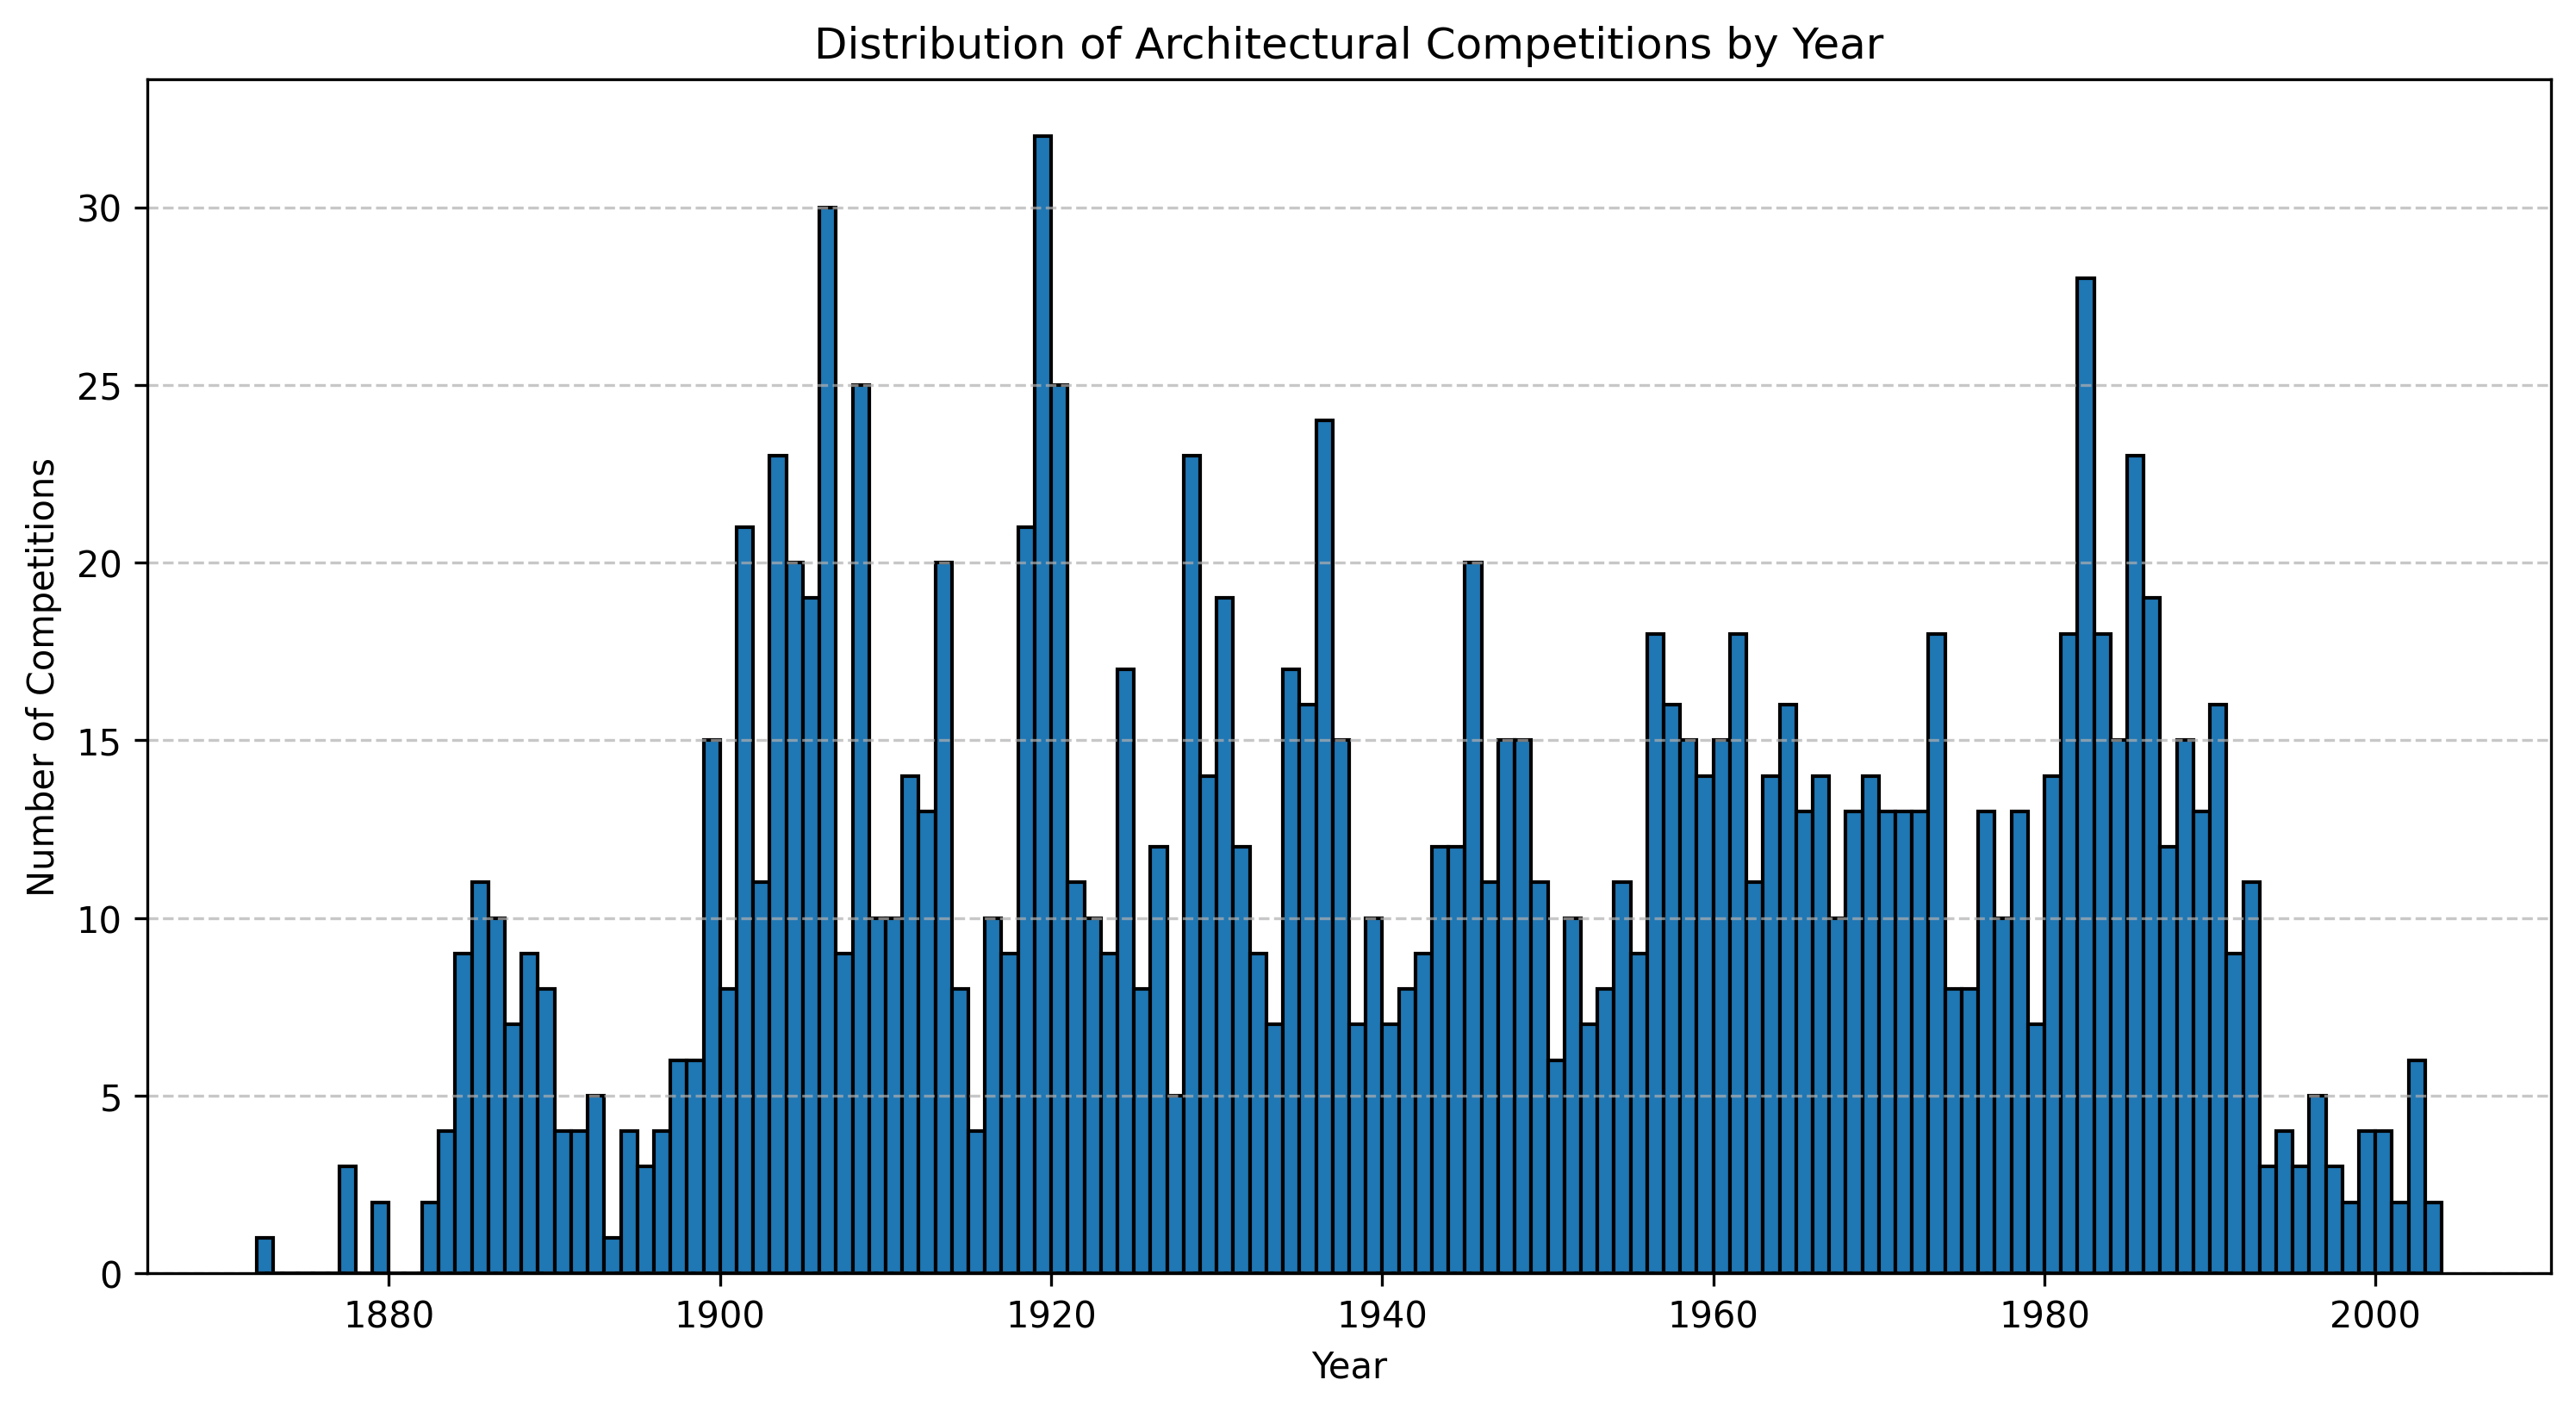

In [39]:
debut_years = acm_competitions_no_juries['Date de début de l\'objet'].dt.year
plt.figure(figsize=(12, 6))
plt.hist(debut_years.dropna(), bins=range(int(debut_years.min()), int(debut_years.max()) + 1, 1), edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Competitions")
plt.title("Distribution of Architectural Competitions by Year")
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [40]:
acm_competitions.to_feather("Data/ACM/AcmEPFL_paired.feather")